In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
!which python

/local/ERAin/bin/python


In [3]:
import Nio
import glob

ModuleNotFoundError: No module named 'Nio'

In [4]:
!ls /Data2/SubX/NASA/GEOS_V2p1/pr_sfc/1999/jul/

pr_sfc_GMAOGEOS_05jul1999_00z_d01_d45_m01.nc
pr_sfc_GMAOGEOS_05jul1999_00z_d01_d45_m02.nc
pr_sfc_GMAOGEOS_05jul1999_00z_d01_d45_m03.nc
pr_sfc_GMAOGEOS_05jul1999_00z_d01_d45_m04.nc
pr_sfc_GMAOGEOS_10jul1999_00z_d01_d45_m01.nc
pr_sfc_GMAOGEOS_10jul1999_00z_d01_d45_m02.nc
pr_sfc_GMAOGEOS_10jul1999_00z_d01_d45_m03.nc
pr_sfc_GMAOGEOS_10jul1999_00z_d01_d45_m04.nc
pr_sfc_GMAOGEOS_15jul1999_00z_d01_d45_m01.nc
pr_sfc_GMAOGEOS_15jul1999_00z_d01_d45_m02.nc
pr_sfc_GMAOGEOS_15jul1999_00z_d01_d45_m03.nc
pr_sfc_GMAOGEOS_15jul1999_00z_d01_d45_m04.nc
pr_sfc_GMAOGEOS_20jul1999_00z_d01_d45_m01.nc
pr_sfc_GMAOGEOS_20jul1999_00z_d01_d45_m02.nc
pr_sfc_GMAOGEOS_20jul1999_00z_d01_d45_m03.nc
pr_sfc_GMAOGEOS_20jul1999_00z_d01_d45_m04.nc
pr_sfc_GMAOGEOS_25jul1999_00z_d01_d45_m01.nc
pr_sfc_GMAOGEOS_25jul1999_00z_d01_d45_m02.nc
pr_sfc_GMAOGEOS_25jul1999_00z_d01_d45_m03.nc
pr_sfc_GMAOGEOS_25jul1999_00z_d01_d45_m04.nc
pr_sfc_GMAOGEOS_30jul1999_00z_d01_d45_m01.nc
pr_sfc_GMAOGEOS_30jul1999_00z_d01_d45_m02.nc
pr_sfc_GMA

In [5]:
ds = xr.open_dataset('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/1999/jul/pr_sfc_GMAOGEOS_05jul1999_00z_d01_d45_m01.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 45)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * time     (time) datetime64[ns] 1999-07-05T12:00:00 ... 1999-08-18T12:00:00
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.1 (http://mpimet.mpg.de/...
    history:      Mon Jun 26 11:23:16 2017: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        yuri-S2S-2_1_UNSTABLE
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    Comment:      yuri-S2S-2_1_UNSTABLE
    CDO:          Climate Data Operators version 1.7.1 (http://mpimet.mpg.de/...

####  The start time is at 00z the lead times at 12z - I am going to ignore this for the time being since I look at some accumulated/maximum weekly value

In [6]:
def ppf2(ds):
    ds.coords['S'] = 'S', np.atleast_1d(ds.time[0].values - np.timedelta64(12, 'h'))
    ds.rename({'time':'L'}, inplace=True)
    ds.coords['L']=((ds.L-ds.S)/ np.timedelta64(1,'D')).squeeze()
    ds = ds.sel(lat=slice(32,42),lon=slice(-103+360,-90+360))
    return ds

In [7]:
import os


In [8]:
Datestr='time/%28Jan%201979%29%28Dec%202015%29RANGE/'

#the url contains 8/mul because they are daily values
url_grid = 'http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.acpcp/'+Datestr+'%5Btime%5D/1/1./boxAverage/8/mul//name//cprcp/def/dods'
url_grid

'http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.acpcp/time/%28Jan%201979%29%28Dec%202015%29RANGE/%5Btime%5D/1/1./boxAverage/8/mul//name//cprcp/def/dods'

In [10]:
varname = 'pr_sfc'
ds_Y = []
for iy in np.arange(1999, 2017):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jun//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jul//*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/aug//*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_allpr = xr.concat(ds_Y, dim='S')
del ds_Y
ds_allpr.S


<xarray.DataArray 'S' (S: 324)>
array(['1999-06-05T00:00:00.000000000', '1999-06-10T00:00:00.000000000',
       '1999-06-15T00:00:00.000000000', ..., '2016-08-19T00:00:00.000000000',
       '2016-08-24T00:00:00.000000000', '2016-08-29T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29

In [11]:
ds_allpr.S

<xarray.DataArray 'S' (S: 324)>
array(['1999-06-05T00:00:00.000000000', '1999-06-10T00:00:00.000000000',
       '1999-06-15T00:00:00.000000000', ..., '2016-08-19T00:00:00.000000000',
       '2016-08-24T00:00:00.000000000', '2016-08-29T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29

In [12]:
varname = 'cape'
ds_Y = []
for iy in np.arange(1999, 2017):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jun//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jul//*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/aug//*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all

ds_allcape = xr.concat(ds_Y, dim='S')
del ds_Y
# print ds_allcape.nbytes/1e9
# ds_allcape.S

In [13]:
varname = 'tas_2m'
ds_Y = []
for iy in np.arange(1999, 2017):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jun//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jul//*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/aug//*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all

ds_alltas_2m = xr.concat(ds_Y, dim='S')
del ds_Y
# print ds_alltas_2m.nbytes/1e9
ds_alltas_2m.S

<xarray.DataArray 'S' (S: 324)>
array(['1999-06-05T00:00:00.000000000', '1999-06-10T00:00:00.000000000',
       '1999-06-15T00:00:00.000000000', ..., '2016-08-19T00:00:00.000000000',
       '2016-08-24T00:00:00.000000000', '2016-08-29T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29

In [14]:
varname = 'tdps_2m'
ds_Y = []
for iy in np.arange(1999, 2017):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jun//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jul//*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/aug//*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_alltdps_2m = xr.concat(ds_Y, dim='S')
del ds_Y
# print ds_alltdps_2m.nbytes/1e9
ds_alltdps_2m.S

<xarray.DataArray 'S' (S: 324)>
array(['1999-06-05T00:00:00.000000000', '1999-06-10T00:00:00.000000000',
       '1999-06-15T00:00:00.000000000', ..., '2016-08-19T00:00:00.000000000',
       '2016-08-24T00:00:00.000000000', '2016-08-29T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29

In [15]:
whos


Variable        Type        Data/Info
-------------------------------------
Datestr         str         time/%28Jan%201979%29%28Dec%202015%29RANGE/
Nio             module      <module 'Nio' from '/home<...>e-packages/PyNIO/Nio.py'>
calendar        module      <module 'calendar' from '<...>b/python3.6/calendar.py'>
date            type        <class 'datetime.date'>
datetime        type        <class 'datetime.datetime'>
ds              Dataset     <xarray.Dataset>\nDimensi<...>(http://mpimet.mpg.de/...
ds_allcape      Dataset     <xarray.Dataset>\nDimensi<...>(http://mpimet.mpg.de/...
ds_allpr        Dataset     <xarray.Dataset>\nDimensi<...>(http://mpimet.mpg.de/...
ds_alltas_2m    Dataset     <xarray.Dataset>\nDimensi<...>(http://mpimet.mpg.de/...
ds_alltdps_2m   Dataset     <xarray.Dataset>\nDimensi<...>(http://mpimet.mpg.de/...
ensnum          int64       4
glob            module      <module 'glob' from '/hom<...>3/lib/python3.6/glob.py'>
iy              int64       2016
mylist   

# MERGE THEM IN ONE DATAARRAY

In [16]:
ds_allpr.merge(ds_allcape, inplace=True)

<xarray.Dataset>
Dimensions:  (L: 45, M: 4, S: 324, lat: 11, lon: 14)
Coordinates:
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 40.5 41.5 42.5 43.5 44.5
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * M        (M) int64 1 2 3 4
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
    cape     (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.go

In [17]:
ds_allpr.merge(ds_alltas_2m, inplace=True)

<xarray.Dataset>
Dimensions:  (L: 45, M: 4, S: 324, lat: 11, lon: 14)
Coordinates:
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 40.5 41.5 42.5 43.5 44.5
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * M        (M) int64 1 2 3 4
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
    cape     (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
    tas      (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File 

In [18]:
ds_allpr.merge(ds_alltdps_2m, inplace=True)

<xarray.Dataset>
Dimensions:  (L: 45, M: 4, S: 324, lat: 11, lon: 14)
Coordinates:
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 40.5 41.5 42.5 43.5 44.5
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * M        (M) int64 1 2 3 4
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
    cape     (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
    tas      (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
    tdps     (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      T

In [19]:
del ds_alltas_2m
del ds_alltdps_2m
del ds_allcape

# SELECT LEAD TIMES

In [282]:
week1 = ds_allpr.sel(L=slice(1.5,7.5))
week1 = week1.stack(MSll=('M','S','lat','lon','L')).compute()
week1

<xarray.Dataset>
Dimensions:  (MSll: 1397088)
Coordinates:
  * MSll     (MSll) MultiIndex
  - M        (MSll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
  - S        (MSll) datetime64[ns] 1999-06-05 1999-06-05 ... 1999-06-05
  - lat      (MSll) float64 32.0 32.0 32.0 32.0 32.0 ... 32.0 32.0 32.0 32.0
  - lon      (MSll) float64 257.0 257.0 257.0 257.0 ... 260.0 260.0 261.0 261.0
  - L        (MSll) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 4.5 5.5 6.5 7.5 1.5 2.5
Data variables:
    pr       (MSll) float32 1.4544655e-06 2.2144386e-06 ... 1.4316872e-06
    cape     (MSll) float32 57.850655 880.7033 385.5577 ... 0.06854106 81.178474
    tas      (MSll) float32 299.75748 300.48535 300.868 ... 290.5633 294.20615
    tdps     (MSll) float32 278.0365 287.17993 284.54108 ... 285.7108 290.00626
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions: 

In [283]:
week1M = ds_allpr.sel(L=slice(1.5,7.5))
week1M = week1M.stack(MSll=('S','lat','lon','L')).mean('M').compute()
week1M

<xarray.Dataset>
Dimensions:  (MSll: 349272)
Coordinates:
  * MSll     (MSll) MultiIndex
  - S        (MSll) datetime64[ns] 1999-06-05 1999-06-05 ... 1999-06-05
  - lat      (MSll) float64 32.0 32.0 32.0 32.0 32.0 ... 32.0 32.0 32.0 32.0
  - lon      (MSll) float64 257.0 257.0 257.0 257.0 ... 260.0 260.0 261.0 261.0
  - L        (MSll) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 4.5 5.5 6.5 7.5 1.5 2.5
Data variables:
    pr       (MSll) float32 5.3608355e-06 1.4481936e-06 ... 6.278772e-06
    cape     (MSll) float32 209.02747 909.85913 528.2646 ... 0.488882 63.665207
    tas      (MSll) float32 299.72928 301.18796 300.33093 ... 290.3282 293.3453
    tdps     (MSll) float32 279.1207 286.57355 285.61038 ... 285.47864 289.59836

In [284]:
week1.coords['MSll'] = np.arange(0,1397088) 
week1M.coords['MSll'] = np.arange(0,349272) 

In [285]:
# plt.hist(week1.tas.values.ravel())

step = 2.
to_bin = lambda x: np.round(x / step) * step
week1["tasb"] = to_bin(week1.tas)
week1M["tasb"] = to_bin(week1M.tas)
# 

# plt.hist(week1.tasb.values.ravel(),bins=20)

In [286]:
grouped1M = week1M[['pr','tasb']].groupby('tasb')
ds_groupM = grouped1M.max()
ds_groupM.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_groupM['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_groupM.quantiles.values),len(ds_groupM.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped1M):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>100:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_groupM['pr_q'].loc[dict(tasb=k)] = var

ds_groupM


0 (3,)
1 (29,)
2 (153,)
3 (853,)
4 (3297,)
5 (9866,)
6 (21464,)
7 (37269,)
8 (59415,)
9 (70477,)
10 (66188,)
11 (47004,)
12 (23496,)
13 (8062,)
14 (1485,)
15 (206,)
16 (5,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 17)
Coordinates:
  * tasb       (tasb) float64 282.0 284.0 286.0 288.0 ... 310.0 312.0 314.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tasb) float64 7.14e-05 0.0003116 ... 1.168e-05 1.357e-07
    pr_q       (quantiles, tasb) float64 0.0 0.0 0.00012 ... 1.155e-05 0.0

In [287]:
grouped1 = week1[['pr','tasb']].groupby('tasb')
ds_group = grouped1.max()
ds_group.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group.quantiles.values),len(ds_group.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped1):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group['pr_q'].loc[dict(tasb=k)] = var

ds_group


0 (2,)
1 (22,)
2 (164,)
3 (931,)
4 (4617,)
5 (16469,)
6 (43533,)
7 (87445,)
8 (145584,)
9 (229936,)
10 (275846,)
11 (260178,)
12 (190819,)
13 (98244,)
14 (35159,)
15 (7170,)
16 (932,)
17 (37,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 18)
Coordinates:
  * tasb       (tasb) float64 280.0 282.0 284.0 286.0 ... 310.0 312.0 314.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tasb) float64 3.158e-05 0.0003874 ... 1.954e-05 3.465e-06
    pr_q       (quantiles, tasb) float64 0.0 0.0 0.0 ... 2.334e-05 1.918e-05 0.0

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


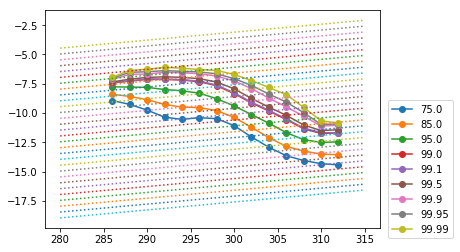

In [177]:
plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-38,-23,0.5):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':')


In [295]:
week2 = ds_allpr.sel(L=slice(8.5,14.5))
week2 = week2.stack(MSll=('M','S','lat','lon','L')).compute()
week2

<xarray.Dataset>
Dimensions:  (MSll: 1397088)
Coordinates:
  * MSll     (MSll) int64 0 1 2 3 4 ... 1397083 1397084 1397085 1397086 1397087
Data variables:
    pr       (MSll) float32 6.518145e-08 1.6701314e-07 ... 0.000258761
    cape     (MSll) float32 29.760439 36.374832 ... 508.68683 39.941257
    tas      (MSll) float32 300.40125 300.2492 301.76965 ... 297.20926 289.2531
    tdps     (MSll) float32 285.25842 285.31042 ... 295.06378 287.63925
    tasb     (MSll) float32 300.0 300.0 302.0 302.0 ... 298.0 296.0 298.0 290.0
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    Comment:      lena-S2S-2_

In [288]:
week2M = ds_allpr.sel(L=slice(8.5,14.5))
weekM2 = week2M.mean('M').stack(MSll=('S','lat','lon','L')).compute()


<xarray.Dataset>
Dimensions:  (L: 7, M: 4, S: 324, lat: 11, lon: 14)
Coordinates:
  * L        (L) float64 8.5 9.5 10.5 11.5 12.5 13.5 14.5
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * M        (M) int64 1 2 3 4
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 7, 11, 14), chunksize=(1, 1, 7, 11, 14)>
    cape     (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 7, 11, 14), chunksize=(1, 1, 7, 11, 14)>
    tas      (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 7, 11, 14), chunksize=(1, 1, 7, 11, 14)>
    tdps     (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 7, 11, 14), chunksize=(1, 1, 7, 11, 14)>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.

In [298]:
week2M = weekM2*1.

In [299]:
week2.coords['MSll'] = np.arange(0,1397088) 
week2M.coords['MSll'] = np.arange(0,349272) 

In [300]:
# plt.hist(week2.tas.values.ravel())

step = 2.
to_bin = lambda x: np.round(x / step) * step
week2["tasb"] = to_bin(week2.tas)
week2M["tasb"] = to_bin(week2M.tas)
# 

# plt.hist(week2.tasb.values.ravel(),bins=20)

In [301]:
grouped2M = week2M[['pr','tasb']].groupby('tasb')
ds_group2M = grouped2M.max()
ds_group2M.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group2M['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group2M.quantiles.values),len(ds_group2M.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped2M):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group2M['pr_q'].loc[dict(tasb=k)] = var

ds_group2M


0 (71,)
1 (868,)
2 (3887,)
3 (12820,)
4 (30866,)
5 (60360,)
6 (79219,)
7 (78138,)
8 (54038,)
9 (21922,)
10 (6030,)
11 (1021,)
12 (32,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 13)
Coordinates:
  * tasb       (tasb) float64 288.0 290.0 292.0 294.0 ... 308.0 310.0 312.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tasb) float64 0.0003639 0.0003478 ... 9.308e-05 2.229e-06
    pr_q       (quantiles, tasb) float64 0.0 3.585e-05 ... 8.646e-05 0.0

In [302]:
grouped2 = week2[['pr','tasb']].groupby('tasb')
ds_group2 = grouped2.max()
ds_group2.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group2['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group2.quantiles.values),len(ds_group2.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped2):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group2['pr_q'].loc[dict(tasb=k)] = var

ds_group2


0 (32,)
1 (178,)
2 (563,)
3 (2880,)
4 (10857,)
5 (30746,)
6 (65045,)
7 (119906,)
8 (216154,)
9 (290011,)
10 (284600,)
11 (217824,)
12 (110737,)
13 (38113,)
14 (8558,)
15 (876,)
16 (8,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 17)
Coordinates:
  * tasb       (tasb) float64 282.0 284.0 286.0 288.0 ... 310.0 312.0 314.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tasb) float64 0.0001326 0.0007936 ... 1.239e-05 1.612e-06
    pr_q       (quantiles, tasb) float64 0.0 0.0 9.9e-05 ... 1.223e-05 0.0

In [294]:
week2M

<xarray.Dataset>
Dimensions:  (L: 7, M: 4, MSll: 349272, S: 324, lat: 11, lon: 14)
Coordinates:
  * L        (L) float64 8.5 9.5 10.5 11.5 12.5 13.5 14.5
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * M        (M) int64 1 2 3 4
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29
  * MSll     (MSll) int64 0 1 2 3 4 5 ... 349267 349268 349269 349270 349271
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 7, 11, 14), chunksize=(1, 1, 7, 11, 14)>
    cape     (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 7, 11, 14), chunksize=(1, 1, 7, 11, 14)>
    tas      (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 7, 11, 14), chunksize=(1, 1, 7, 11, 14)>
    tdps     (M, S, L, lat, lon) float32 dask.array<shape=(4, 324, 7, 11, 14), chunksize=(1, 1, 7, 11, 14)>
    tasb     (M, S, L, lat, lon) float32 300.0 300

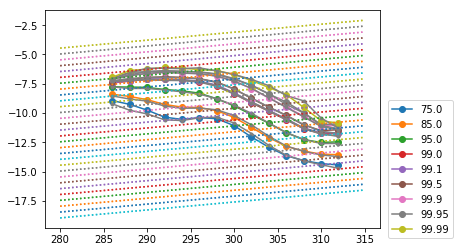

In [182]:
plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-38,-23,0.5):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':')
    
plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q.T),'.-', color='grey')
plt.legend(ds_group2.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-38,-23,0.5):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':')


Text(0, 0.5, '$lnI$')

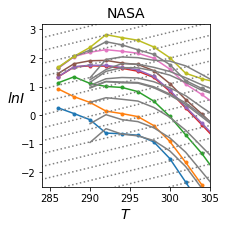

In [304]:
# plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
# plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# # plt.xlim((287,315))
# for iim in np.arange(-39,-23,0.5):
#     plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':', color='grey')
    
# plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q.T),'-', color='grey')
# plt.legend(ds_group2.quantiles.values, loc=3,bbox_to_anchor=(1.01,0))
# # plt.xlim((287,315))
# plt.title('NASA')
# plt.ylim((-12,-6))
# plt.xlim((282,312))

plt.figure(figsize=(3,3))
# plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T*86400/8),'.-')
# plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q.T*86400/8),'-', color='grey')
plt.plot(ds_groupM.tasb,np.log(ds_groupM.pr_q.T*86400/8),'.-')
plt.plot(ds_group2M.tasb,np.log(ds_group2M.pr_q.T*86400/8),'-', color='grey')
# plt.xlim((287,315))
for iim in np.arange(-31,-13,0.45):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':', color='grey')
plt.title('NASA', fontsize=14)
plt.ylim((-2.5,3.2))
plt.xlim((284,305))
# plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
plt.xlabel(r'$T$', fontsize=14)
plt.ylabel(r'$lnI$', rotation=0, fontsize=14)

In [31]:
# week3 = ds_allpr.sel(L=slice(15.5,21.5))

In [190]:
step = 2.
to_bin = lambda x: np.round(x / step) * step
week1["tdpsb"] = to_bin(week1.tdps)

grouped1 = week1[['pr','tdpsb']].groupby('tdpsb')
ds_group = grouped1.max()
ds_group.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group['pr_q'] = (('quantiles','tdpsb'), np.zeros((len(ds_group.quantiles.values),len(ds_group.tdpsb.values)))) 
for iim, (k, gp) in enumerate(grouped1):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group['pr_q'].loc[dict(tdpsb=k)] = var

ds_group


0 (1,)
1 (5,)
2 (25,)
3 (100,)
4 (251,)
5 (519,)
6 (1036,)
7 (1945,)
8 (4019,)
9 (9113,)
10 (22267,)
11 (53204,)
12 (105621,)
13 (169184,)
14 (217788,)
15 (234689,)
16 (243024,)
17 (225503,)
18 (101204,)
19 (7585,)
20 (5,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tdpsb: 21)
Coordinates:
  * tdpsb      (tdpsb) float64 260.0 262.0 264.0 266.0 ... 296.0 298.0 300.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tdpsb) float64 3.734e-12 3.491e-09 ... 0.002037 7.172e-05
    pr_q       (quantiles, tdpsb) float64 0.0 0.0 0.0 ... 0.001984 0.001871 0.0

In [191]:
step = 2.
to_bin = lambda x: np.round(x / step) * step
week2["tdpsb"] = to_bin(week2.tdps)
grouped2 = week2[['pr','tdpsb']].groupby('tdpsb')
ds_group2 = grouped2.max()
ds_group2.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group2['pr_q'] = (('quantiles','tdpsb'), np.zeros((len(ds_group2.quantiles.values),len(ds_group2.tdpsb.values)))) 
for iim, (k, gp) in enumerate(grouped2):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group2['pr_q'].loc[dict(tdpsb=k)] = var

ds_group2

0 (6,)
1 (34,)
2 (94,)
3 (177,)
4 (325,)
5 (578,)
6 (1045,)
7 (1745,)
8 (3586,)
9 (8648,)
10 (21883,)
11 (50041,)
12 (99669,)
13 (163050,)
14 (215461,)
15 (239057,)
16 (253006,)
17 (235193,)
18 (97695,)
19 (5794,)
20 (1,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tdpsb: 21)
Coordinates:
  * tdpsb      (tdpsb) float64 260.0 262.0 264.0 266.0 ... 296.0 298.0 300.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tdpsb) float64 1.119e-06 8.964e-07 ... 0.001923 9.66e-06
    pr_q       (quantiles, tdpsb) float64 0.0 0.0 0.0 ... 0.00191 0.001861 0.0

Text(0, 0.5, '$lnI$')

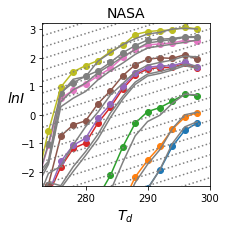

In [196]:
# plt.plot(ds_group.tdpsb,np.log(ds_group.pr_q.T),'o-')
# plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# # plt.xlim((287,315))
# for iim in np.arange(-35,-23,0.75):
#     plt.plot(np.array([270,315]),iim+0.068*np.array([270,315]),':', color='grey')
    
# plt.plot(ds_group2.tdpsb,np.log(ds_group2.pr_q.T),'-', color='grey')
# plt.legend(ds_group2.quantiles.values, loc=3,bbox_to_anchor=(1.01,0))
# # plt.xlim((287,315))
# plt.title('NASA')
# plt.ylim((-18,-5.5))
# plt.xlim((270,300))

plt.figure(figsize=(3,3))
plt.plot(ds_group.tdpsb,np.log(ds_group.pr_q.T*86400/8),'o-')
plt.plot(ds_group2.tdpsb,np.log(ds_group2.pr_q.T*86400/8),'-', color='grey')
# plt.xlim((287,315))
for iim in np.arange(-31,-13,0.4):
    plt.plot(np.array([270,315]),iim+0.068*np.array([270,315]),':', color='grey')
plt.title('NASA', fontsize=14)
plt.ylim((-2.5,3.2))
plt.xlim((273,300))
# plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
plt.xlabel(r'$T_d$', fontsize=14)
plt.ylabel(r'$lnI$', rotation=0, fontsize=14)

# Comparison with NARR logistic regression

In [35]:
week1lr = ds_allpr.sel(L=slice(1.5,7.5))
week1lr = week1lr.stack(Mll=('M','lat','lon')).compute()
week1lr

<xarray.Dataset>
Dimensions:  (L: 7, Mll: 616, S: 324)
Coordinates:
  * L        (L) float64 1.5 2.5 3.5 4.5 5.5 6.5 7.5
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1
  - lat      (Mll) float64 32.0 32.0 32.0 32.0 32.0 ... 33.0 33.0 33.0 34.0 34.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
Data variables:
    pr       (S, L, Mll) float32 1.4544655e-06 0.00012284526 ... 1.4316872e-06
    cape     (S, L, Mll) float32 57.850655 897.31934 ... 42.036423 81.178474
    tas      (S, L, Mll) float32 299.75748 299.31808 ... 293.03616 294.20615
    tdps     (S, L, Mll) float32 278.0365 288.56055 ... 289.2237 290.00626
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    H

In [36]:
!which R

/usr/bin/R


# Logistic Regression

In [95]:
week1lr_all = ds_allpr.sel(L=slice(1.5,7.5)) 
#I drop the first value, L=0.5,  but the target time of this is still the week starting at 0.
week1lr_all = week1lr_all.stack(Mll=('M','lat','lon')).compute()
print(week1lr_all)

<xarray.Dataset>
Dimensions:  (L: 7, Mll: 616, S: 324)
Coordinates:
  * L        (L) float64 1.5 2.5 3.5 4.5 5.5 6.5 7.5
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1
  - lat      (Mll) float64 32.0 32.0 32.0 32.0 32.0 ... 33.0 33.0 33.0 34.0 34.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
Data variables:
    pr       (S, L, Mll) float32 1.4544655e-06 0.00012284526 ... 1.4316872e-06
    cape     (S, L, Mll) float32 57.850655 897.31934 ... 42.036423 81.178474
    tas      (S, L, Mll) float32 299.75748 299.31808 ... 293.03616 294.20615
    tdps     (S, L, Mll) float32 278.0365 288.56055 ... 289.2237 290.00626
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    H

In [96]:
week1lr = week1lr_all.mean(dim='L')
print(week1lr)

<xarray.Dataset>
Dimensions:  (Mll: 616, S: 324)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1
  - lat      (Mll) float64 32.0 32.0 32.0 32.0 32.0 ... 33.0 33.0 33.0 34.0 34.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
Data variables:
    pr       (S, Mll) float32 1.8785574e-06 1.9363559e-05 ... 5.063821e-05
    cape     (S, Mll) float32 562.5521 648.04755 ... 16.850485 25.755838
    tas      (S, Mll) float32 301.0809 300.71042 ... 292.74142 293.27148
    tdps     (S, Mll) float32 284.37918 286.2509 ... 289.02567 289.11722


# calculate the first target time for each weekly period. I add a 12 hour to use the center value as in INGRID, but really it starts at 00z

In [97]:
week1lr.coords['T']=week1lr['S'].values+np.timedelta64(1,'D')+np.timedelta64(12,'h')
print(week1lr)

<xarray.Dataset>
Dimensions:  (Mll: 616, S: 324, T: 324)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 ... 2016-08-24 2016-08-29
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1
  - lat      (Mll) float64 32.0 32.0 32.0 32.0 32.0 ... 33.0 33.0 33.0 34.0 34.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
  * T        (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
Data variables:
    pr       (S, Mll) float32 1.8785574e-06 1.9363559e-05 ... 5.063821e-05
    cape     (S, Mll) float32 562.5521 648.04755 ... 16.850485 25.755838
    tas      (S, Mll) float32 301.0809 300.71042 ... 292.74142 293.27148
    tdps     (S, Mll) float32 284.37918 286.2509 ... 289.02567 289.11722


In [98]:
import netCDF4
ds_Y =[]
for iy in np.arange(1999, 2017):
    print( iy)
    url = ('http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/('+
           np.str(iy)+
          ')/VALUES/time/(0000%201%20Jun)/(0000%2011%20Sep)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/')
    print(url)
    ds_temp = xr.open_dataset(url+'dods')
    ds_Y.append(ds_temp)
    del ds_temp
    
ds_NARRpr = xr.concat(ds_Y, dim='time')

1999
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/(1999)/VALUES/time/(0000%201%20Jun)/(0000%2011%20Sep)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/
2000
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/(2000)/VALUES/time/(0000%201%20Jun)/(0000%2011%20Sep)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/
2001
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/(2001)/VALUES/time/(0000%201%20Jun)/(0000%2011%20Sep)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/
2002
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/(2002)/VALUES/time/(0000%201%20Jun)/(0000%2011%20Sep)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/
2003
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/

In [99]:
ds_NARRpr

<xarray.Dataset>
Dimensions:  (lat: 11, lon: 14, time: 1728)
Coordinates:
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * time     (time) datetime64[ns] 1999-06-04T12:00:00 ... 2016-09-07T12:00:00
Data variables:
    apcp     (time, lat, lon) float32 0.029748196 0.17702776 ... 0.92881
Attributes:
    Conventions:  IRIDL

## INGRID GIVE THE CENTER DAY VALUE as time index - so the first value (1-8) has date 4.5 I fix that.

In [100]:
ds_NARRpr.coords['time'] = ds_NARRpr.time-np.timedelta64(3,'D')
ds_NARRpr.time

<xarray.DataArray 'time' (time: 1728)>
array(['1999-06-01T12:00:00.000000000', '1999-06-02T12:00:00.000000000',
       '1999-06-03T12:00:00.000000000', ..., '2016-09-02T12:00:00.000000000',
       '2016-09-03T12:00:00.000000000', '2016-09-04T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1999-06-01T12:00:00 ... 2016-09-04T12:00:00

In [101]:
week1lr["T"]

<xarray.DataArray 'T' (T: 324)>
array(['1999-06-06T12:00:00.000000000', '1999-06-11T12:00:00.000000000',
       '1999-06-16T12:00:00.000000000', ..., '2016-08-20T12:00:00.000000000',
       '2016-08-25T12:00:00.000000000', '2016-08-30T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * T        (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00

In [102]:
ds_NARRpr_T

<xarray.Dataset>
Dimensions:  (T: 324, lat: 11, lon: 14)
Coordinates:
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
    time     (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
  * T        (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
Data variables:
    apcp     (T, lat, lon) float32 0.09990341 0.3702298 ... 0.06445447
Attributes:
    Conventions:  IRIDL

In [103]:
week1lr["T"]

<xarray.DataArray 'T' (T: 324)>
array(['1999-06-06T12:00:00.000000000', '1999-06-11T12:00:00.000000000',
       '1999-06-16T12:00:00.000000000', ..., '2016-08-20T12:00:00.000000000',
       '2016-08-25T12:00:00.000000000', '2016-08-30T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * T        (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00

In [104]:
ds_NARRpr_T = ds_NARRpr.sel(time=week1lr["T"])
ds_NARRpr_T.time-ds_NARRpr_T['T']

<xarray.DataArray (T: 324)>
array([0, 0, 0, ..., 0, 0, 0], dtype='timedelta64[ns]')
Coordinates:
    time     (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
  * T        (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00

In [105]:
week1lrStoT = week1lr
week1lrStoT['S'] = week1lrStoT['T'].values
week1lrStoT

<xarray.Dataset>
Dimensions:  (Mll: 616, S: 324, T: 324)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1
  - lat      (Mll) float64 32.0 32.0 32.0 32.0 32.0 ... 33.0 33.0 33.0 34.0 34.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
  * T        (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
Data variables:
    pr       (S, Mll) float32 1.8785574e-06 1.9363559e-05 ... 5.063821e-05
    cape     (S, Mll) float32 562.5521 648.04755 ... 16.850485 25.755838
    tas      (S, Mll) float32 301.0809 300.71042 ... 292.74142 293.27148
    tdps     (S, Mll) float32 284.37918 286.2509 ... 289.02567 289.11722

In [204]:
weektemp = week1lrStoT.unstack()
weektemp = weektemp.stack(ll=('lat','lon')).compute()
weektemp

<xarray.Dataset>
Dimensions:  (M: 4, S: 324, T: 324, ll: 154)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
  * T        (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
  * M        (M) int64 1 2 3 4
  * ll       (ll) MultiIndex
  - lat      (ll) float64 32.0 32.0 32.0 32.0 32.0 ... 33.0 33.0 33.0 34.0 34.0
  - lon      (ll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
Data variables:
    pr       (S, M, ll) float32 1.8785574e-06 1.9363559e-05 ... 5.063821e-05
    cape     (S, M, ll) float32 562.5521 648.04755 ... 16.850485 25.755838
    tas      (S, M, ll) float32 301.0809 300.71042 ... 292.74142 293.27148
    tdps     (S, M, ll) float32 284.37918 286.2509 ... 289.02567 289.11722

### plots

(0.05, 0.45)

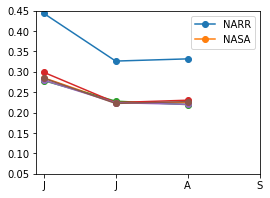

In [206]:
fig = plt.figure(figsize=(4,3))
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']).groupby('time.month').mean(),'-o')
plt.plot(week1lrStoT.mean(dim='Mll').pr.groupby('S.month').mean()*84600/8,'-o') 
plt.plot(weektemp.mean(dim='ll').pr.groupby('S.month').mean('S')*84600/8,'-o') 
plt.legend(('NARR','NASA'))
plt.xticks((0,1,2,3),('J','J','A','S'))
plt.ylim((0.05,0.45))

Text(0, 0.9, '0.8')

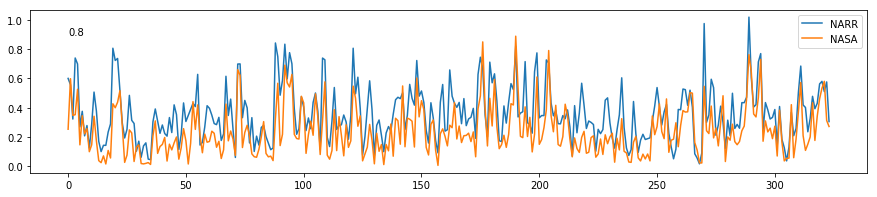

In [211]:
fig = plt.figure(figsize=(15,3))
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']))
plt.plot(week1lrStoT.mean(dim='Mll').pr*84600/8) 
# for ii in weektemp.ll:
#     plt.plot(weektemp.sel(ll=ii).pr*84600/8) 

# plt.plot(weektemp.mean(dim='ll').pr*84600/8) 
plt.legend(('NARR','NASA'))
plt.text(0,0.9,
         np.round(np.corrcoef(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),week1lrStoT.mean(dim='Mll').pr*84600/8)[0,1],2))

In [263]:
len(valuesp)/2

162.0

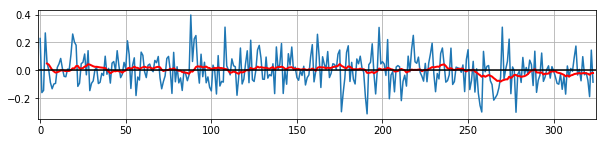

In [281]:
fig = plt.figure(figsize=(10,2))
valuesp = (ds_NARRpr_T.apcp.mean(dim=['lat','lon']).values)-(week1lrStoT.mean(dim='Mll').pr.values*84600/8)
plt.plot(valuesp-np.nanmean(valuesp))
# plt.plot([-1,345],[0,0]+np.nanmean(valuesp[0:int(len(valuesp)/2)])-np.nanmean(valuesp))
# plt.plot([-1,345],[0,0]+np.nanmean(valuesp[int(len(valuesp)/2):])-np.nanmean(valuesp))
valuesp = ((ds_NARRpr_T.apcp.mean(dim=['lat','lon']).rolling(T=20,min_periods=5).mean().values)-
         (week1lrStoT.mean(dim='Mll').pr.rolling(S=20,min_periods=5).mean().values*84600/8))
plt.plot(valuesp-np.nanmean(valuesp),'r-',lw=2)

plt.plot([-1,345],[0,0],'k')
plt.xlim(-1,325)
plt.grid()

In [275]:
ds_NARRpr_T.time

<xarray.DataArray 'time' (T: 324)>
array(['1999-06-06T12:00:00.000000000', '1999-06-11T12:00:00.000000000',
       '1999-06-16T12:00:00.000000000', ..., '2016-08-20T12:00:00.000000000',
       '2016-08-25T12:00:00.000000000', '2016-08-30T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    time     (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
  * T        (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00

Text(0, 0.5, 'NASA')

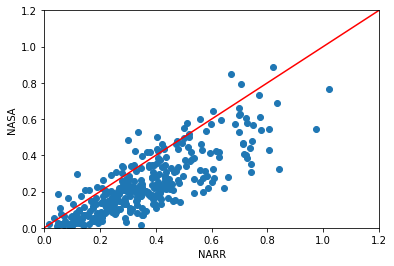

In [109]:
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),week1lr.mean(dim='Mll').pr*84600/8,'o') 
plt.xlim((0,1.2))
plt.ylim((0,1.2))
plt.plot([0,1.5],[0,1.5],'r-')
plt.xlabel('NARR')
plt.ylabel('NASA')

In [110]:
aa = ds_NARRpr_T.apcp.mean(dim=['lat','lon'])#quantile(q=85.)
quantile_threshold_mean  = aa.quantile(0.85)
quantile_threshold_all  = np.nanpercentile(ds_NARRpr_T.apcp.values.ravel(),85)

Text(0, 0.5, 'NASA-cape')

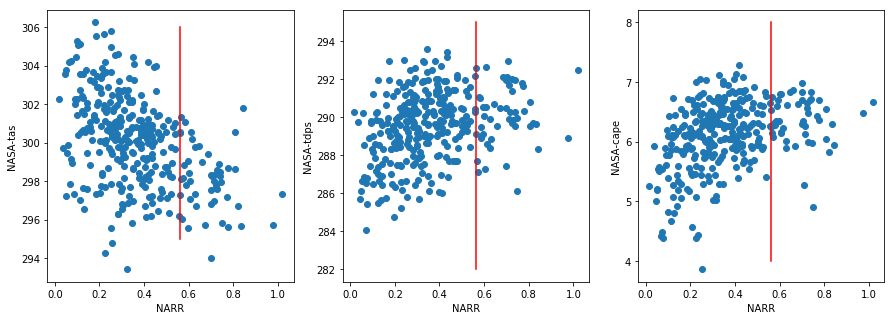

In [111]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),week1lr.mean(dim='Mll').tas,'o') 
plt.plot([quantile_threshold_mean.values,quantile_threshold_mean.values],[295, 306],'r-')
plt.xlabel('NARR')
plt.ylabel('NASA-tas')
ax = plt.subplot(1,3,2)
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),week1lr.mean(dim='Mll').tdps,'o') 
plt.plot([quantile_threshold_mean.values,quantile_threshold_mean.values],[282, 295],'r-')
plt.xlabel('NARR')
plt.ylabel('NASA-tdps')
ax = plt.subplot(1,3,3)
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),np.log(week1lr.mean(dim='Mll').cape),'o') 
plt.plot([quantile_threshold_mean.values,quantile_threshold_mean.values],[4, 8],'r-')
plt.xlabel('NARR')
plt.ylabel('NASA-cape')

# I have to create a pandas dataframe to do logistic regression so i will manipulate some names and coords

In [250]:
week1lr_us = week1lr.unstack()
print(week1lr_us)
# there is a weird 34.99999999 instead of 35
week1lr_us.coords['lat'] = np.round(week1lr_us.lat.values)

week1lr_us = week1lr_us.drop('T')
print(week1lr_us)
week1lr_us.rename({'S':'T'}, inplace=True)
print(week1lr_us)


<xarray.Dataset>
Dimensions:  (M: 4, S: 324, T: 324, lat: 11, lon: 14)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
  * T        (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
  * M        (M) int64 1 2 3 4
  * lat      (lat) float64 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * lon      (lon) float64 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
Data variables:
    pr       (S, M, lat, lon) float32 1.8785574e-06 ... 5.063821e-05
    cape     (S, M, lat, lon) float32 562.5521 648.04755 ... 16.850485 25.755838
    tas      (S, M, lat, lon) float32 301.0809 300.71042 ... 292.74142 293.27148
    tdps     (S, M, lat, lon) float32 284.37918 286.2509 ... 289.02567 289.11722
<xarray.Dataset>
Dimensions:  (M: 4, S: 324, lat: 11, lon: 14)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
  * M        (M) int64 1 2 3 4
  * lat      (lat) float64 32.0 33.0 34.0 35.0 36.0 ... 38.0 3

In [251]:
ds_merged = ds_NARRpr_T.drop('time')

ds_merged = ds_merged.merge(week1lr_us)
ds_merged

<xarray.Dataset>
Dimensions:  (M: 4, T: 324, lat: 11, lon: 14)
Coordinates:
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * T        (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
  * M        (M) int64 1 2 3 4
Data variables:
    apcp     (T, lat, lon) float32 0.055901356 0.360378 ... 0.24144946
    pr       (T, M, lat, lon) float32 1.8785574e-06 ... 5.063821e-05
    cape     (T, M, lat, lon) float32 562.5521 648.04755 ... 16.850485 25.755838
    tas      (T, M, lat, lon) float32 301.0809 300.71042 ... 292.74142 293.27148
    tdps     (T, M, lat, lon) float32 284.37918 286.2509 ... 289.02567 289.11722
Attributes:
    Conventions:  IRIDL

# let's repeat the observation #ens times, one per ensemble members


In [253]:
dstemp = ds_merged.apcp.expand_dims(dim='M',axis=1).to_dataset(name='apcp')
ds_merged['apcp_rep']=(('T','M','lat','lon'), np.repeat(dstemp.apcp,4,axis=1))

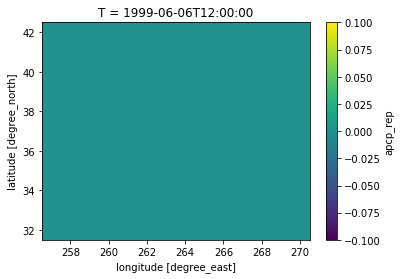

In [254]:
(ds_merged.apcp_rep[0,0]-ds_merged.apcp_rep[0,3]).plot()

In [255]:
ds_merged.to_netcdf('ds_merged_NASA_allM.nc')

In [256]:
ds_merged = ds_merged.mean(dim='M')
ds_merged.to_netcdf('ds_merged_NASA.nc')


In [220]:
df_merged = ds_merged[['apcp_rep','pr','tas','tdps','cape']].to_dataframe()

df_merged = df_merged.reset_index()

In [257]:
ds_merged_mean = ds_merged.mean(dim=['lat','lon'])
ds_merged_mean.to_netcdf('ds_merged_mean_NASA.nc')
df_merged_mean = ds_merged_mean[['apcp_rep','pr','tas','tdps','cape']].to_dataframe()
df_merged_mean = df_merged_mean.reset_index()

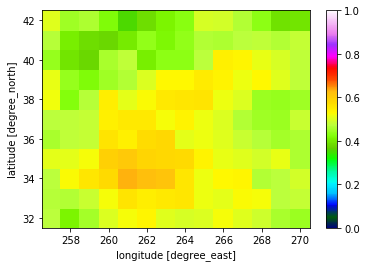

In [224]:
import bottleneck

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])

spearman_correlation(ds_merged.apcp_rep, ds_merged.pr*86400/8.,'T').plot(vmin=0, vmax=1,cmap='gist_ncar')

## Fix units

In [225]:
df_merged['pr']= df_merged['pr']*84600/8 
df_merged_mean['pr']= df_merged_mean['pr']*84600/8 

In [226]:
df_merged['y']=df_merged.apcp_rep>=quantile_threshold_all
df_merged_mean['y']=df_merged_mean.apcp_rep>=quantile_threshold_mean.values

In [227]:
df_merged['logcape'] = np.log(df_merged['cape'])
df_merged_mean['logcape'] = np.log(df_merged_mean['cape'])
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged = df_merged.dropna()

In [243]:
X = df_merged[['pr','tas','tdps','cape','logcape','T']]
y = df_merged.loc[:, df_merged.columns == 'y']
X['const']=1

Xm = df_merged_mean[['pr','tas','tdps','cape','logcape','T']]
ym = df_merged_mean.loc[:, df_merged_mean.columns == 'y']
Xm['const']=1

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [244]:
def random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,firstmodel,secondmodel):
    AA = ((REAL.values[:,0]-PREDICTION_A.values)**2)**(1/2.)
    BB = ((REAL.values[:,0]-PREDICTION_B.values)**2)**(1/2.)
    better_AA = AA<BB
    better_AA = better_AA.astype(int)
    better_AA[better_AA==0]=-1
    plt.plot(np.cumsum(better_AA), label=secondmodel)
    plt.title(firstmodel)
    plt.legend( bbox_to_anchor=(1, 0))
#     plt.yscale('symlog')
def random_walk_mike_map(TIMEINDEX, REAL, PREDICTION_A, PREDICTION_B,firstmodel,secondmodel):
    df_temp = TIMEINDEX
    df_temp['REAL']=REAL.values[:,0]
    df_temp['PA'] = PREDICTION_A.values
    df_temp['PB'] = PREDICTION_B.values
    AA=np.zeros((pd.unique(df_temp['T']).shape))
    BB=np.zeros((pd.unique(df_temp['T']).shape))
    for ik,(k,gp) in enumerate(df_temp.groupby('T')):
       
        AA[ik] = np.sum((gp.REAL.values-gp.PA.values)**2)
        BB[ik] = np.sum((gp.REAL.values-gp.PB.values)**2)
    better_AA = AA<BB
    better_AA = better_AA.astype(int)
    better_AA[better_AA==0]=-1
    plt.plot(np.cumsum(better_AA), label=secondmodel)
    plt.title(firstmodel)
    plt.legend( bbox_to_anchor=(1, 0))
#     plt.yscale('symlog')

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

Optimization terminated successfully.
         Current function value: 0.370611
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.093     
Dependent Variable: y                AIC:              18496.0294
Date:               2018-12-17 13:21 BIC:              18512.2785
No. Observations:   24948            Log-Likelihood:   -9246.0   
Df Model:           1                LL-Null:          -10194.   
Df Residuals:       24946            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -2.4438     0.0262   -93.4270   0.0000   -2.4951   -2.3926
pr        2.2368     0.0535    41.7977   0.0000    2.1319 

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

Optimization terminated successfully.
         Current function value: 0.389451
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.047      
Dependent Variable: y                AIC:              19436.0659 
Date:               2018-12-17 13:21 BIC:              19452.3150 
No. Observations:   24948            Log-Likelihood:   -9716.0    
Df Model:           1                LL-Null:          -10194.    
Df Residuals:       24946            LLR p-value:      7.6531e-210
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -2.6324     0.0350   -75.2005   0.0000   -2.7010   -2.5638
cape       0.0015     0.0000    31.1191   0.0

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Optimization terminated successfully.
         Current function value: 0.369763
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.095     
Dependent Variable: y                AIC:              18455.6845
Date:               2018-12-17 13:22 BIC:              18480.0582
No. Observations:   24948            Log-Likelihood:   -9224.8   
Df Model:           2                LL-Null:          -10194.   
Df Residuals:       24945            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     10.4312     1.9749    5.2819   0.0000    6.5605   14.3020
pr         2.0468     0.0603   33.9631   0.0000    1.9287 

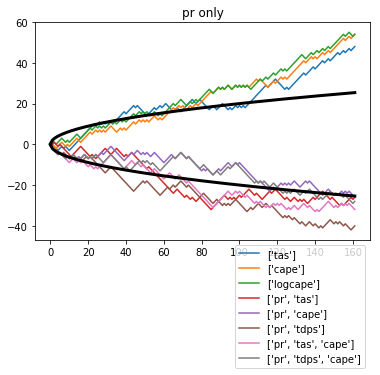

In [247]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)

y_trainT = y_trainT.astype(int)

X_trainT = X[0:int(X.shape[0]/2)]
y_trainT = y[0:int(X.shape[0]/2)].astype(int)
X_testT = X[int(X.shape[0]/2):]
y_testT = y[int(X.shape[0]/2):].astype(int)


# whichytest = y_testT.index
# df_merged_test = df_merged.loc[whichytest]
# ds_merged_test = df_merged_test.set_index(['M','T','lat','lon']).to_xarray().mean('M')
# del df_merged_test
# df_merged_test = ds_merged_test.to_dataframe()
# df_merged_test = df_merged_test.reset_index()
# df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_all
# X_testT = df_merged_test[['pr','tas','tdps','cape','logcape']]
# y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
# X_testT['const']=1
# y_testT = y_testT.loc[X_testT.dropna().index]
# X_testT = X_testT.dropna()
y_testT = y_testT.astype(int)

REAL = y_testT
varname = ['const','pr']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
model = LogisticRegression(C=1e8)

result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))

print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_A = predictions*1.

varname = ['const','tas']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.
plt.figure()
random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname = ['const','cape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.


random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname = ['const','logcape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train,missing = 'drop')
result1=logit_model.fit(missing = 'drop')
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.


random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.


random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','cape'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.


random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.


random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.


random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.


random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])
NN = len(pd.unique(X_testT[['T']].values[:,0]))
plt.plot(np.arange(0,NN),2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)
plt.plot(np.arange(0,NN),-2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)

['pr']
[[2.35720699]]
[-2.45495154]
liblinear
Accuracy of logistic regression classifier on test set: 0.85
log loss: 0.3762
0.5458280334174536


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


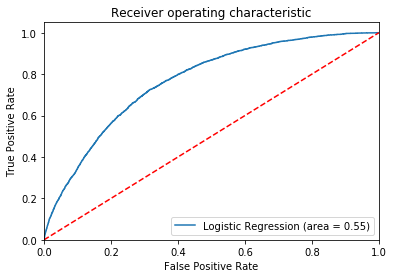

['pr', 'tas']
0
[[ 2.27997647 -0.00825977]]
[0.04372094]
Accuracy of logistic regression classifier on test set: 0.85
log loss: 0.3759
0.545194053239987


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


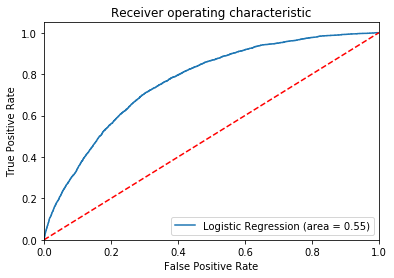

['pr', 'tdps']
0
[[ 2.32635447 -0.00812674]]
[-0.08247863]
Accuracy of logistic regression classifier on test set: 0.85
log loss: 0.3775
0.5448000702132857


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


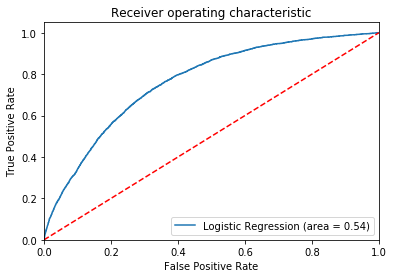

['pr', 'cape']
0
[[2.16317900e+00 8.85321093e-04]]
[-2.92251618]
Accuracy of logistic regression classifier on test set: 0.85
log loss: 0.3683
0.5475968994220124


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


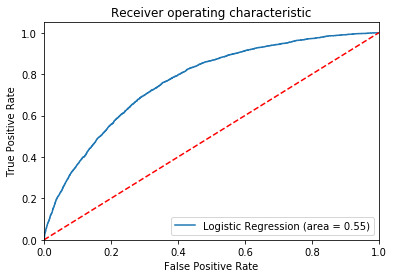

['pr', 'logcape']
0
[[2.12553342 0.52051847]]
[-5.57839663]
Accuracy of logistic regression classifier on test set: 0.85
log loss: 0.3675
0.5467571892298926


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


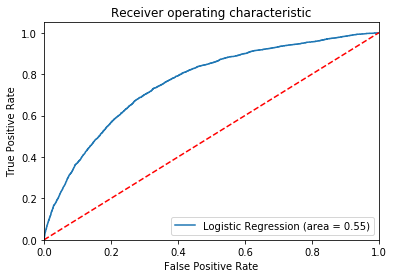

['pr', 'tas', 'cape']
0
[[ 2.15097314e+00 -9.90064810e-03  8.90806793e-04]]
[0.0401093]
Accuracy of logistic regression classifier on test set: 0.85
log loss: 0.3679
0.5488070610143276


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


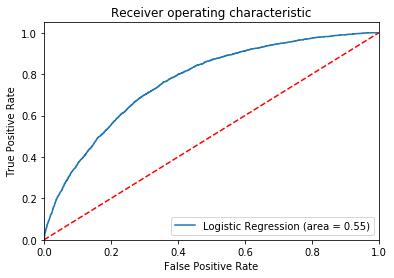

['pr', 'tdps', 'cape']
0
[[ 2.19794762e+00 -1.00398319e-02  9.14684721e-04]]
[-0.03661839]
Accuracy of logistic regression classifier on test set: 0.85
log loss: 0.3692
0.5482369342233799


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


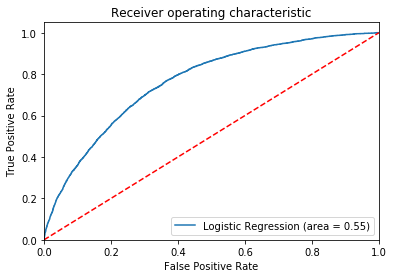

In [232]:


y_test = y_testT
y_train  =y_trainT


varname=['pr' ]   
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
# logreg = LogisticRegression()
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.coef_)
print(logreg.intercept_)
print(logreg.solver)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas'    ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','cape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


varname=['pr','logcape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas' ,'cape'   ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps','cape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Optimization terminated successfully.
         Current function value: 0.233442
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.429     
Dependent Variable: y                AIC:              79.6351   
Date:               2018-12-17 13:28 BIC:              85.8103   
No. Observations:   162              Log-Likelihood:   -37.818   
Df Model:           1                LL-Null:          -66.182   
Df Residuals:       160              LLR p-value:      5.0004e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -5.5736     0.8487   -6.5672   0.0000   -7.2370   -3.9102
pr        12.0041     2.1475    5.5898   0.0000    7.7951 

Optimization terminated successfully.
         Current function value: 0.213486
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.477     
Dependent Variable: y                AIC:              77.1694   
Date:               2018-12-17 13:28 BIC:              89.5198   
No. Observations:   162              Log-Likelihood:   -34.585   
Df Model:           3                LL-Null:          -66.182   
Df Residuals:       158              LLR p-value:      1.2199e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
           Coef.    Std.Err.     z     P>|z|     [0.025    0.975] 
------------------------------------------------------------------
const     -13.4237   57.8723  -0.2320  0.8166  -126.8513  100.0038
pr         12.5109    2.9280   4.2729  0.0000     6.7722   18.

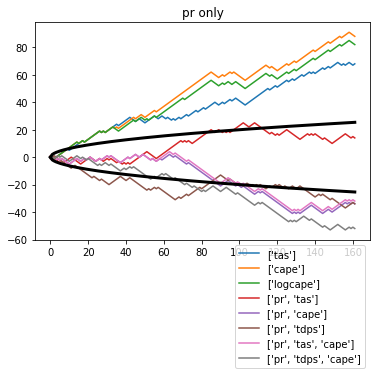

In [249]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
X_trainT, X_testT, y_trainT, y_testT = train_test_split(Xm, ym, test_size=0.5, random_state=0)
y_trainT = y_trainT.astype(int)

# X_trainT = Xm[int(Xm.shape[0]/2):]
# y_trainT = ym[int(Xm.shape[0]/2):].astype(int)
# X_testT = Xm[0:int(Xm.shape[0]/2)]
# y_testT = ym[0:int(Xm.shape[0]/2)].astype(int)

X_trainT = Xm[0:int(Xm.shape[0]/2)]
y_trainT = ym[0:int(Xm.shape[0]/2)].astype(int)
X_testT = Xm[int(Xm.shape[0]/2):]
y_testT = ym[int(Xm.shape[0]/2):].astype(int)

# X_trainT = Xm[0:int(Xm.shape[0])]
# y_trainT = ym[0:int(Xm.shape[0])].astype(int)
# X_testT = Xm[0:int(Xm.shape[0])]
# y_testT = ym[0:int(Xm.shape[0])].astype(int)


# whichytest = y_testT.index
# df_merged_test = df_merged_mean.loc[whichytest]
# ds_merged_test = df_merged_test.set_index(['M','T']).to_xarray().mean('M')
# del df_merged_test
# df_merged_test = ds_merged_test.to_dataframe()
# df_merged_test = df_merged_test.reset_index()
# df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_mean.values
# X_testT = df_merged_test[['pr','tas','tdps','cape','logcape']]
# y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
# X_testT['const']=1
# y_testT = y_testT.loc[X_testT.dropna().index]
# X_testT = X_testT.dropna()
y_testT = y_testT.astype(int)
REAL = y_testT


varname = ['const','pr']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
model = LogisticRegression(C=1e8)

result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))

print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_A = predictions*1.
varname = ['const','tas']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.
plt.figure()
random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])


varname = ['const','cape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])


varname = ['const','logcape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','cape'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])
plt.plot(np.arange(0,len(REAL.values[:,0])),2.*(np.arange(0,len(REAL.values[:,0])))**(1/2.),'k-',lw=3)
plt.plot(np.arange(0,len(REAL.values[:,0])),-2.*(np.arange(0,len(REAL.values[:,0])))**(1/2.),'k-',lw=3)

['pr']
[[11.46240399]]
[-5.16683763]
liblinear
Accuracy of logistic regression classifier on test set: 0.91
log loss: 0.2169
0.7931818181818181


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


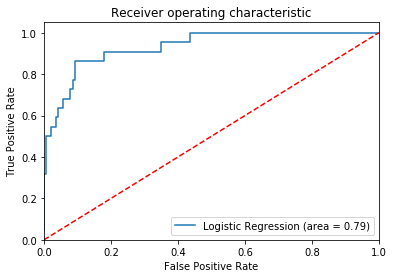

['pr', 'tas']
0
[[11.204236   -0.01807934]]
[0.33139033]
Accuracy of logistic regression classifier on test set: 0.91
log loss: 0.2168
0.7931818181818181


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


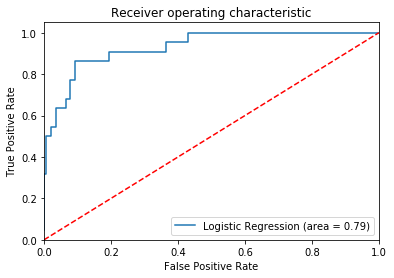

['pr', 'tdps']
0
[[11.40554547 -0.01767897]]
[-0.01786858]
Accuracy of logistic regression classifier on test set: 0.91
log loss: 0.2166
0.7931818181818181


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


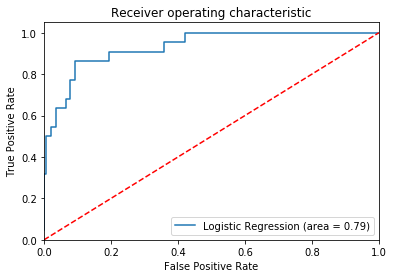

['pr', 'cape']
0
[[1.08124339e+01 1.45192710e-03]]
[-5.76034444]
Accuracy of logistic regression classifier on test set: 0.90
log loss: 0.2139
0.7896103896103895


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


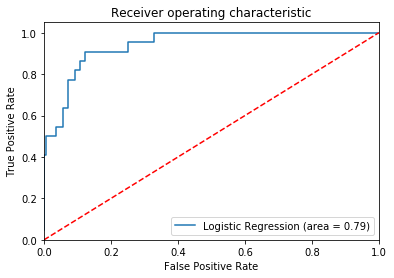

['pr', 'logcape']
0
[[11.39645045  1.27655028]]
[-13.18205111]
Accuracy of logistic regression classifier on test set: 0.88
log loss: 0.2179
0.7405844155844156


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


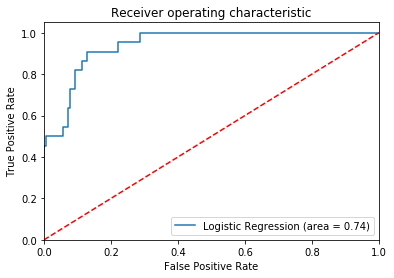

['pr', 'tas', 'cape']
0
[[ 1.07909021e+01 -2.07814685e-02  1.63153193e-03]]
[0.34391657]
Accuracy of logistic regression classifier on test set: 0.90
log loss: 0.2127
0.7668831168831168


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


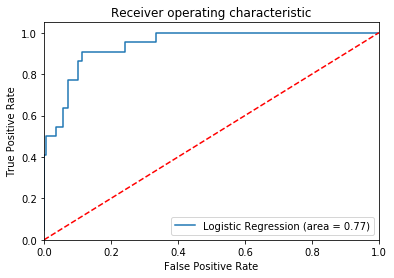

['pr', 'tdps', 'cape']
0
[[ 1.09985264e+01 -2.08915144e-02  1.69525889e-03]]
[0.08010996]
Accuracy of logistic regression classifier on test set: 0.90
log loss: 0.2123
0.7668831168831168


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


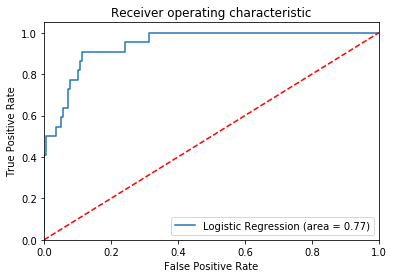

In [234]:

y_test = y_testT
y_train  =y_trainT


varname=['pr' ]   
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
# logreg = LogisticRegression()
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.coef_)
print(logreg.intercept_)
print(logreg.solver)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas'    ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','cape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','logcape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas' ,'cape'   ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps','cape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# per grid point

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, wa

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

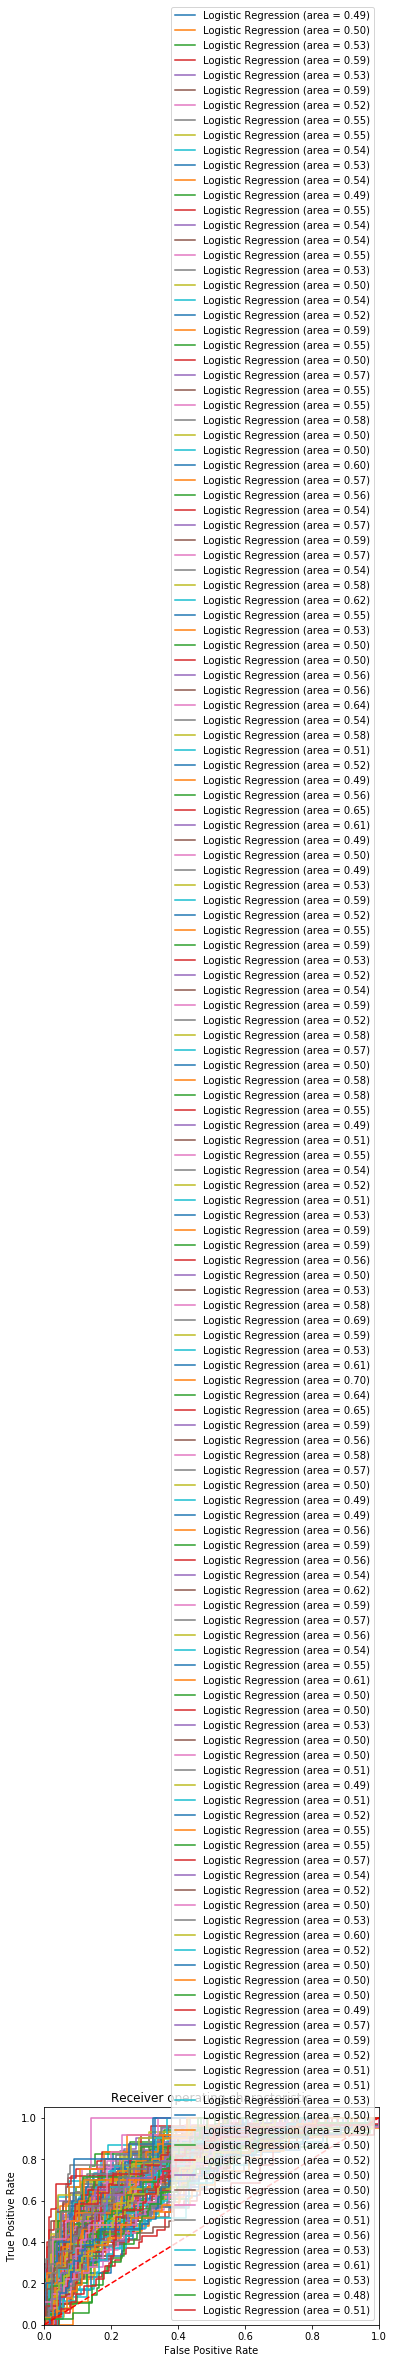

In [235]:
coefvalues = np.zeros((len(np.arange(32, 43)),len(np.arange(257, 271))))
aucvalues = np.zeros((len(np.arange(32, 43)),len(np.arange(257, 271))))
plt.figure()

for ilat, latx in enumerate(np.arange(32, 43)):
    for ilon, lonx in enumerate(np.arange(257, 271)):
        df_temp = df_merged[(df_merged.lat==latx)&(df_merged.lon==lonx)].dropna()
        
        X = df_temp[['pr','tas','tdps','cape','logcape']]
        y = df_temp.loc[:, df_temp.columns == 'y']
        X['const']=1
        X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)
        y_train  =y_trainT
        
        
#         whichytest = y_testT.index
#         df_merged_test = df_temp.loc[whichytest]
#         ds_merged_test = df_merged_test.set_index(['M','T']).to_xarray().mean('M')
#         del df_merged_test
#         df_merged_test = ds_merged_test.to_dataframe()
#         df_merged_test = df_merged_test.reset_index()
#         df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_all
#         X_testT = df_merged_test[['pr','tas','tdps','cape','logcape']]
#         y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
#         X_testT['const']=1
#         y_testT = y_testT.loc[X_testT.dropna().index]
#         X_testT = X_testT.dropna()
        y_testT = y_testT.astype(int)
        y_test = y_testT*1.



        varname=['pr' ]   
        X_train = X_trainT[varname]
        X_test = X_testT[varname]
        # logreg = LogisticRegression()
        logreg = LogisticRegression(C=1e8)
        logreg.fit(X_train, y_train)
        logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
        coefvalues[ilat,ilon]= logreg.coef_
        aucvalues[ilat,ilon]= logit_roc_auc
#         print(logreg.intercept_)
#         print(logreg.solver)
#         y_pred = logreg.predict(X_test)
#         print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
#         print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

#         logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#         print(logit_roc_auc)
        fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
        plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")





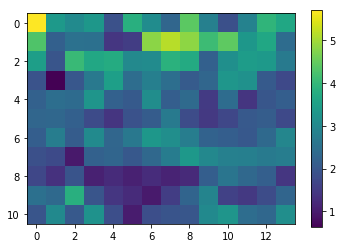

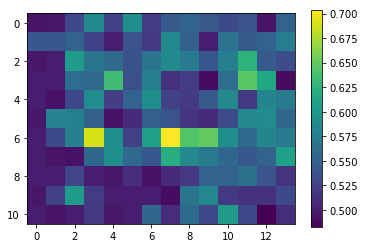

In [236]:
plt.figure()
plt.imshow(coefvalues)
plt.colorbar()
plt.figure()
plt.imshow(aucvalues)
plt.colorbar()

In [ ]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.7, random_state=0)

y_test = y_testT
y_train  =y_trainT


varname=['pr' ]   
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
# logreg = LogisticRegression()
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.coef_)
print(logreg.intercept_)
print(logreg.solver)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()